                           Escola Politécnica da Universidade de São Paulo
                                         Data: 29/09/2019
#       PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões
### Análise e aplicação do k-NN a base *household Costa Rica*
#### Autor: Lucas Nunes Sequeira

# 1. Avaliando a base de dados

### 1.1 Importando algumas bibliotecas

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### 1.2 Importando dados

In [124]:
df_train = pd.read_csv('train.csv')
df_train.set_index('Id', inplace = True)

In [125]:
df_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
Id,,,,,,,,,,,,,,,,,,,,,
ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Core Data fields

    - Id - a unique identifier for each row.
    
    - Target - the target is an ordinal variable indicating groups of income levels.
        - 1 = extreme poverty
        - 2 = moderate poverty
        - 3 = vulnerable households
        - 4 = non vulnerable households
    - idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.
    - parentesco1 - indicates if this person is the head of the household.


Lista de atributos:

    Id
    v2a1, Monthly rent payment #####
    hacdor, =1 Overcrowding by bedrooms ####
    rooms,  number of all rooms in the house ##
    hacapo, =1 Overcrowding by rooms ####
    v14a, =1 has bathroom in the household #####
    refrig, =1 if the household has refrigerator ###
    v18q, owns a tablet ##
    v18q1, number of tablets household owns #
    r4h1, Males younger than 12 years of age ##
    r4h2, Males 12 years of age and older ##
    r4h3, Total males in the household ##
    r4m1, Females younger than 12 years of age ##
    r4m2, Females 12 years of age and older ##
    r4m3, Total females in the household ##
    r4t1, persons younger than 12 years of age ##
    r4t2, persons 12 years of age and older ##
    r4t3, Total persons in the household ###
    tamhog, size of the household ##
    tamviv, number of persons living in the household ##
    escolari, years of schooling ####
    rez_esc, Years behind in school ##
    hhsize, household size ##
    
    paredblolad, =1 if predominant material on the outside wall is block or brick ###
    paredzocalo, "=1 if predominant material on the outside wall is socket (wood,  zinc or absbesto" ##
    paredpreb, =1 if predominant material on the outside wall is prefabricated or cement ##
    pareddes, =1 if predominant material on the outside wall is waste material ##
    paredmad, =1 if predominant material on the outside wall is wood ##
    paredzinc, =1 if predominant material on the outside wall is zink ##
    paredfibras, =1 if predominant material on the outside wall is natural fibers ##
    paredother, =1 if predominant material on the outside wall is other ##
    
    pisomoscer, "=1 if predominant material on the floor is mosaic,  ceramic,  terrazo" ##
    pisocemento, =1 if predominant material on the floor is cement ##
    pisoother, =1 if predominant material on the floor is other ##
    pisonatur, =1 if predominant material on the floor is  natural material ##
    pisonotiene, =1 if no floor at the household ###
    pisomadera, =1 if predominant material on the floor is wood ##
    
    techozinc, =1 if predominant material on the roof is metal foil or zink ##
    techoentrepiso, "=1 if predominant material on the roof is fiber cement,  mezzanine " ##
    techocane, =1 if predominant material on the roof is natural fibers ###
    techootro, =1 if predominant material on the roof is other ##
    
    cielorazo, =1 if the house has ceiling ####
    abastaguadentro, =1 if water provision inside the dwelling ###
    abastaguafuera, =1 if water provision outside the dwelling ##
    abastaguano, =1 if no water provision ###
    
    public, "=1 electricity from CNFL,  ICE,  ESPH/JASEC" #
    planpri, =1 electricity from private plant #
    noelec, =1 no electricity in the dwelling ###
    coopele, =1 electricity from cooperative ##
    
    sanitario1, =1 no toilet in the dwelling ###
    sanitario2, =1 toilet connected to sewer or cesspool #
    sanitario3, =1 toilet connected to  septic tank #
    sanitario5, =1 toilet connected to black hole or letrine #
    sanitario6, =1 toilet connected to other system #
    
    energcocinar1, =1 no main source of energy used for cooking (no kitchen) ###
    energcocinar2, =1 main source of energy used for cooking electricity ##
    energcocinar3, =1 main source of energy used for cooking gas ##
    energcocinar4, =1 main source of energy used for cooking wood charcoal ##
    
    elimbasu1, =1 if rubbish disposal mainly by tanker truck ##
    elimbasu2, =1 if rubbish disposal mainly by botan hollow or buried ##
    elimbasu3, =1 if rubbish disposal mainly by burning ##
    elimbasu4, =1 if rubbish disposal mainly by throwing in an unoccupied space ##
    elimbasu5, "=1 if rubbish disposal mainly by throwing in river,  creek or sea" ###
    elimbasu6, =1 if rubbish disposal mainly other ##
    
    epared1, =1 if walls are bad ##
    epared2, =1 if walls are regular ##
    epared3, =1 if walls are good ##
    etecho1, =1 if roof are bad ##
    etecho2, =1 if roof are regular ##
    etecho3, =1 if roof are good ##
    
    eviv1, =1 if floor are bad ##
    eviv2, =1 if floor are regular ##
    eviv3, =1 if floor are good ##
    
    dis, =1 if disable person ##
    male, =1 if male ##
    female, =1 if female ##
    
    estadocivil1, =1 if less than 10 years old #
    estadocivil2, =1 if free or coupled uunion #
    estadocivil3, =1 if married #
    estadocivil4, =1 if divorced #
    estadocivil5, =1 if separated #
    estadocivil6, =1 if widow/er #
    estadocivil7, =1 if single #
    
    parentesco1, =1 if household head #
    parentesco2, =1 if spouse/partner #
    parentesco3, =1 if son/doughter #
    parentesco4, =1 if stepson/doughter #
    parentesco5, =1 if son/doughter in law #
    parentesco6, =1 if grandson/doughter #
    parentesco7, =1 if mother/father #
    parentesco8, =1 if father/mother in law #
    parentesco9, =1 if brother/sister #
    parentesco10, =1 if brother/sister in law #
    parentesco11, =1 if other family member #
    parentesco12, =1 if other non family member #
    
    idhogar, Household level identifier #####
    
    hogar_nin, Number of children 0 to 19 in household ####
    hogar_adul, Number of adults in household ##
    hogar_mayor, # of individuals 65+ in the household ##
    hogar_total, # of total individuals in the household ##
    
    dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64) ###
    edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 ###
    edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0 ##
    
    meaneduc,average years of education for adults (18+) ###
    
    instlevel1, =1 no level of education ##
    instlevel2, =1 incomplete primary ##
    instlevel3, =1 complete primary ##
    instlevel4, =1 incomplete academic secondary level ##
    instlevel5, =1 complete academic secondary level ##
    instlevel6, =1 incomplete technical secondary level ##
    instlevel7, =1 complete technical secondary level ##
    instlevel8, =1 undergraduate and higher education ##
    instlevel9, =1 postgraduate higher education ##
    
    bedrooms, number of bedrooms ##
    overcrowding, # persons per room ###
    
    tipovivi1, =1 own and fully paid house ###
    tipovivi2, "=1 own,  paying in installments" ###
    tipovivi3, =1 rented ##
    tipovivi4, =1 precarious ###
    tipovivi5, "=1 other(assigned,  borrowed)" ###
    computer, =1 if the household has notebook or desktop computer #
    television, =1 if the household has TV #
    mobilephone, =1 if mobile phone #
    qmobilephone, # of mobile phones #
    lugar1, =1 region Central ###
    lugar2, =1 region Chorotega ###
    lugar3, =1 region PacÃƒÂ­fico central ###
    lugar4, =1 region Brunca ###
    lugar5, =1 region Huetar AtlÃƒÂ¡ntica ###
    lugar6, =1 region Huetar Norte ###
    area1, =1 zona urbana ####
    area2, =2 zona rural ####
    age, Age in years ##
    
    SQBescolari, escolari squared ##
    SQBage, age squared ##
    SQBhogar_total, hogar_total squared ##
    SQBedjefe, edjefe squared ##
    SQBhogar_nin, hogar_nin squared ##
    SQBovercrowding, overcrowding squared ####
    SQBdependency, dependency squared ###
    SQBmeaned, square of the mean years of education of adults (>=18) in the household ###
    
    agesq, Age squared

    Target

Education:

    escolari, years of schooling ####
    SQBmeaned, square of the mean years of education of adults (>=18) in the household ###

People:
    
    hogar_nin, Number of children 0 to 19 in household ####
    dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64) ###
    hogar_total, # of total individuals in the household ##

Region:
    
    area1, =1 zona urbana ####
    lugar1, =1 region Central ###

Fisical:

    cielorazo, =1 if the house has ceiling ####
    pisonotiene, =1 if no floor at the household ###
    v14a, =1 has bathroom in the household #####
    
    
Serviços:

    abastaguano, =1 if no water provision ###
    v2a1, Monthly rent payment #####
    
Overcrowd:
    
    hacdor, =1 Overcrowding by bedrooms ####

### 1.3 Seleção de dados por intuição

In [126]:
features = ['idhogar', 'parentesco1', 'escolari', 'SQBmeaned', 'hogar_nin', 'hogar_total', 'area1',
            'lugar1', 'cielorazo', 'pisonotiene', 'v14a', 'abastaguano', 'v2a1',
            'hacdor', 'rez_esc', 'meaneduc', 'SQBovercrowding', 'abastaguadentro',
            'tipovivi1', 'Target']

In [127]:
base = df_train[features]

In [128]:
base.head()

,idhogar,parentesco1,escolari,SQBmeaned,hogar_nin,hogar_total,area1,lugar1,cielorazo,pisonotiene,v14a,abastaguano,v2a1,hacdor,rez_esc,meaneduc,SQBovercrowding,abastaguadentro,tipovivi1,Target
Id,,,,,,,,,,,,,,,,,,,,
ID_279628684,21eb7fcc1,1,10,100.0,0,1,1,1,1,0,1,0,190000.0,0,NaN,10.0,1.000000,1,0,4
ID_f29eb3ddd,0e5d7a658,1,12,144.0,0,1,1,1,1,0,1,0,135000.0,0,NaN,12.0,1.000000,1,0,4
ID_68de51c94,2c7317ea8,1,11,121.0,0,1,1,1,1,0,1,0,NaN,0,NaN,11.0,0.250000,1,1,4
ID_d671db89c,2b58d945f,0,9,121.0,2,4,1,1,1,0,1,0,180000.0,0,1.0,11.0,1.777778,1,0,4
ID_d56d6f5f5,2b58d945f,0,11,121.0,2,4,1,1,1,0,1,0,180000.0,0,NaN,11.0,1.777778,1,0,4


### 1.4 Seleção por parentesco e idhogar

In [129]:
base = base[base['parentesco1'] == 1]
base.shape

base = base.drop(['idhogar', 'parentesco1'], axis = 1)

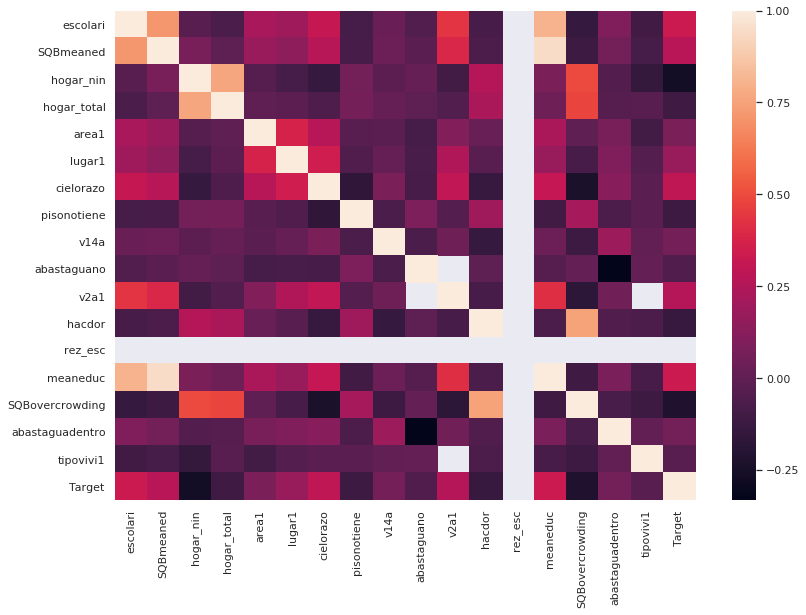

In [130]:
corrmat = base.corr()
sns.set()
plt.figure(figsize=(13,9))
sns.heatmap(corrmat)

# 2. Limpeza dos dados

### 2.1 Determinando dados faltantes

In [131]:
total = base.isnull().sum().sort_values(ascending = False)
percent = ((base.isnull().sum()/base.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
rez_esc,2972,99.966364
v2a1,2156,72.519341
SQBmeaned,3,0.100908
meaneduc,3,0.100908
Target,0,0.000000


### 2.2 Fazendo alterações sobre a base

In [132]:
base = base.drop(['v2a1', 'rez_esc'], axis = 1)

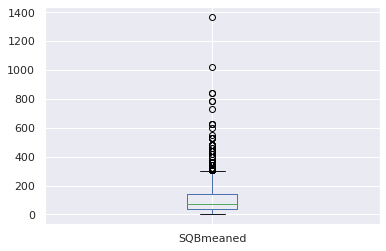

In [133]:
base['SQBmeaned'].plot(kind = 'box')

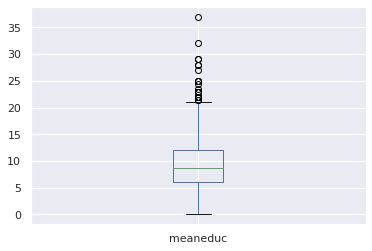

In [134]:
base['meaneduc'].plot(kind = 'box')

In [135]:
col = 'SQBmeaned'
base[col] = base[col].fillna(base[col].describe().mean())

col = 'meaneduc'
base[col] = base[col].fillna(base[col].describe().mean())

In [136]:
total = base.isnull().sum().sort_values(ascending = False)
percent = ((base.isnull().sum()/base.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
Target,0,0.0
tipovivi1,0,0.0
abastaguadentro,0,0.0
SQBovercrowding,0,0.0
meaneduc,0,0.0


# 3. Visualização dos dados

In [137]:
base.head()

,escolari,SQBmeaned,hogar_nin,hogar_total,area1,lugar1,cielorazo,pisonotiene,v14a,abastaguano,hacdor,meaneduc,SQBovercrowding,abastaguadentro,tipovivi1,Target
Id,,,,,,,,,,,,,,,,
ID_279628684,10,100.0,0,1,1,1,1,0,1,0,0,10.0,1.000000,1,0,4
ID_f29eb3ddd,12,144.0,0,1,1,1,1,0,1,0,0,12.0,1.000000,1,0,4
ID_68de51c94,11,121.0,0,1,1,1,1,0,1,0,0,11.0,0.250000,1,1,4
ID_ec05b1a7b,11,121.0,2,4,1,1,1,0,1,0,0,11.0,1.777778,1,0,4
ID_1284f8aad,9,100.0,2,4,1,1,1,0,1,0,1,10.0,16.000000,1,0,4


### 3.1 Pairplot

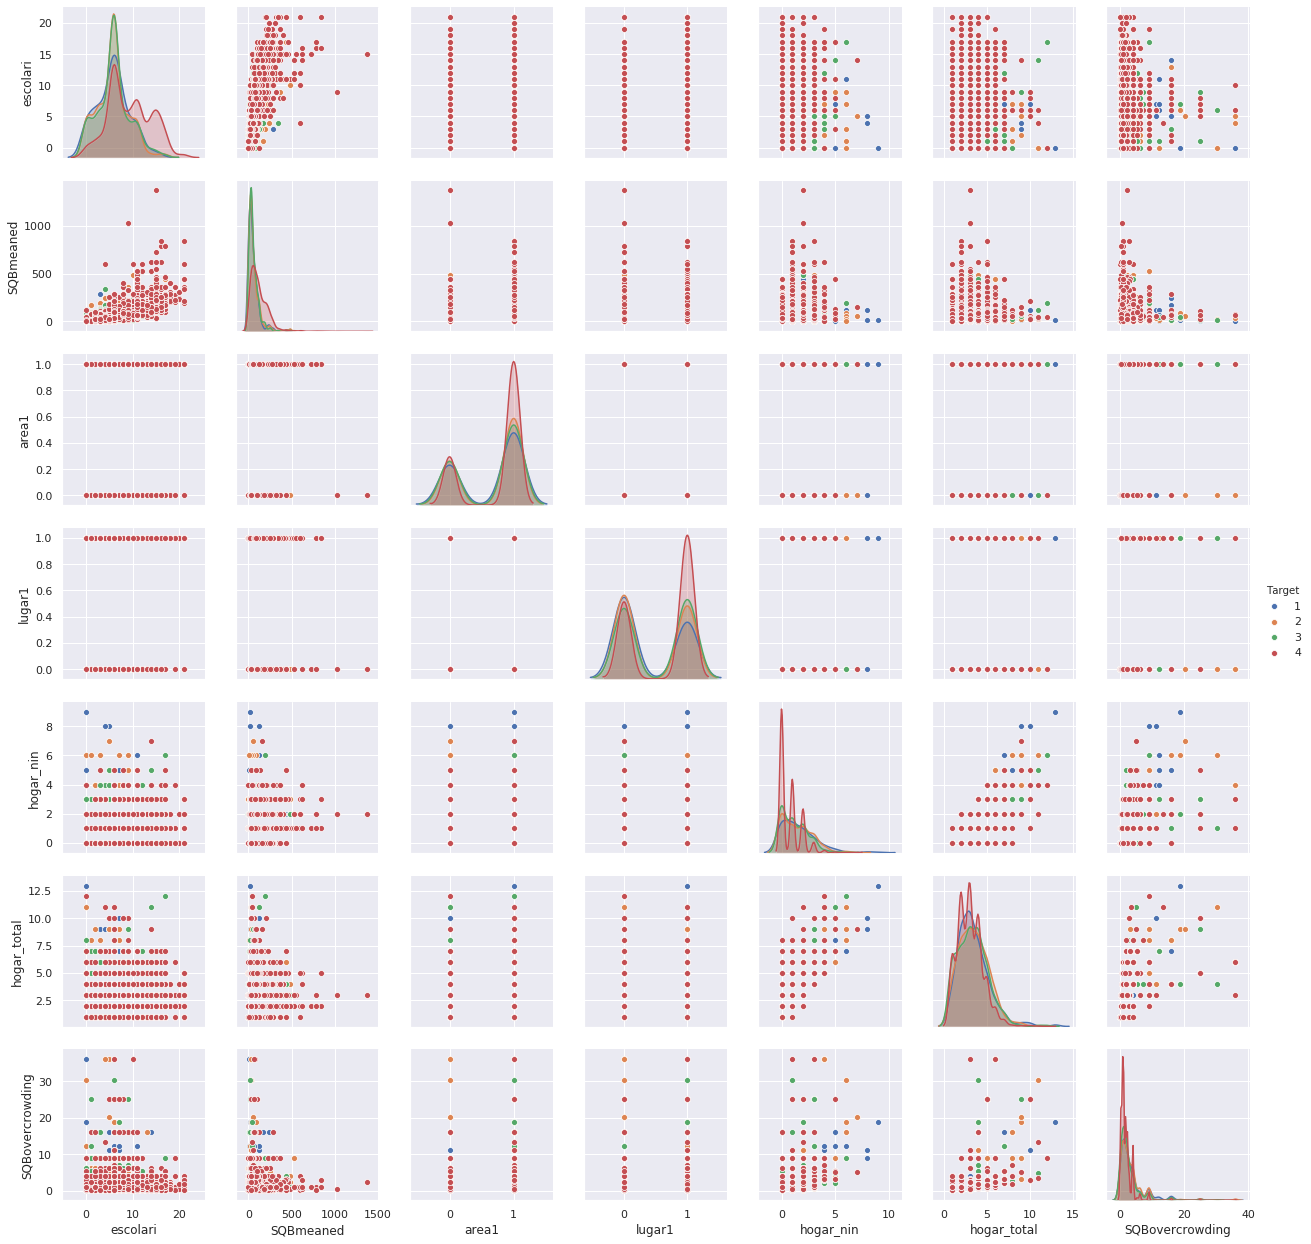

In [138]:
cols = ['escolari', 'SQBmeaned', 'area1', 'lugar1', 'hogar_nin', 'hogar_total', 'SQBovercrowding']

sns.set()
sns.pairplot(base, hue = 'Target', vars = cols)

### 3.2 Boxplot

Text(0.5, 1.0, 'Boxplot of escolari over Target')

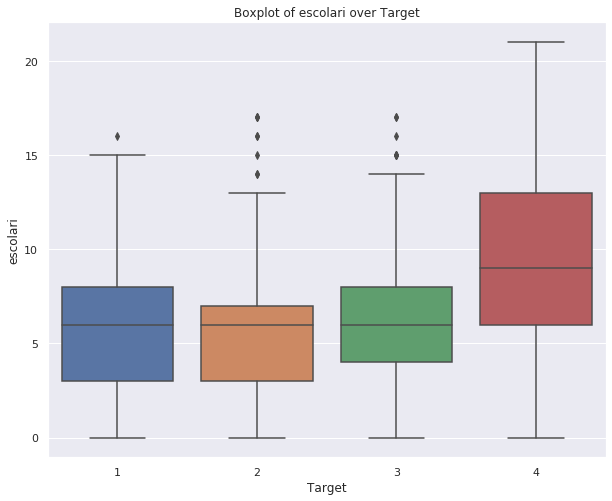

In [139]:
var2 = 'escolari'
var1 = 'Target'

data = pd.concat([base[var2], base[var1]], axis=1)

f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x=var1, y=var2, data=data)
plt.title('Boxplot of escolari over Target')

Maior a escolaridade, maior o nível social (em média)

Text(0.5, 1.0, 'Boxplot of hogar_nin over Target')

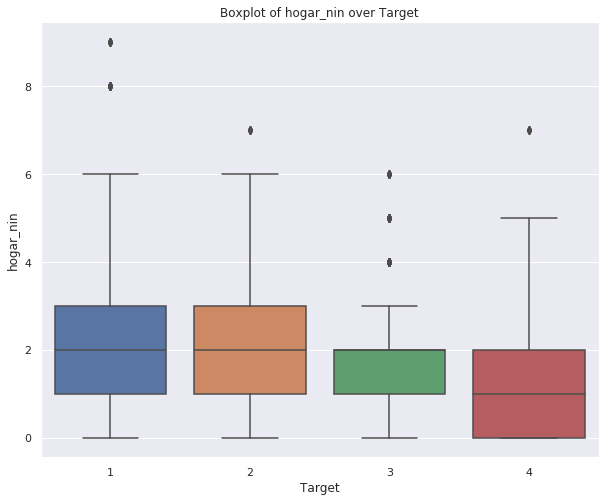

In [140]:
var2 = 'hogar_nin'
var1 = 'Target'

data = pd.concat([df_train[var2], df_train[var1]], axis=1)

f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x=var1, y=var2, data=data)
plt.title('Boxplot of hogar_nin over Target')

Nivel socioeconômico descresce com aumento de crianças

Text(0.5, 1.0, 'Boxplot of escolari over Target')

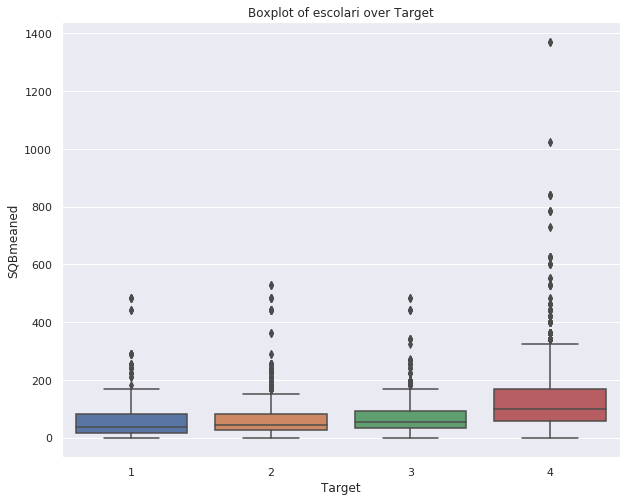

In [141]:
var2 = 'SQBmeaned'
var1 = 'Target'

data = pd.concat([df_train[var2], df_train[var1]], axis=1)

f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x=var1, y=var2, data=data)
plt.title('Boxplot of escolari over Target')

Similar à *escolari*

### 3.3 Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c9f01a7b8>,
      dtype=object)

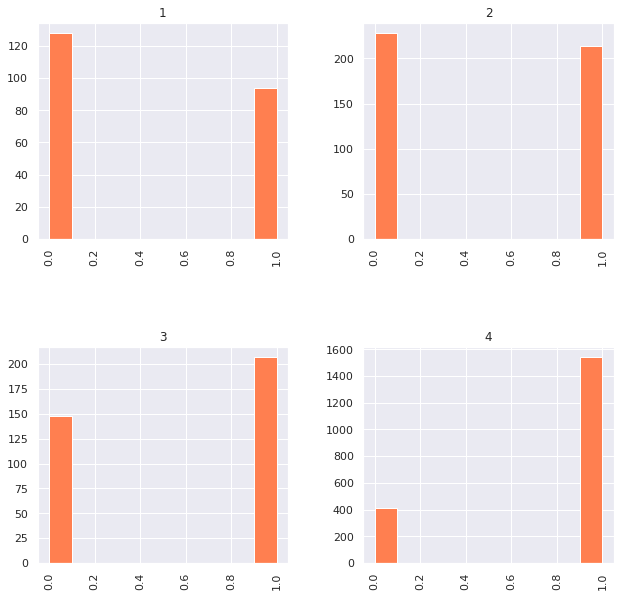

In [142]:
base.hist(column='cielorazo', by ='Target', figsize=(10,10), color = 'coral')

Percentual de casas com teto aumenta com aumento do nível socioeconômico

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c9ef92160>,
      dtype=object)

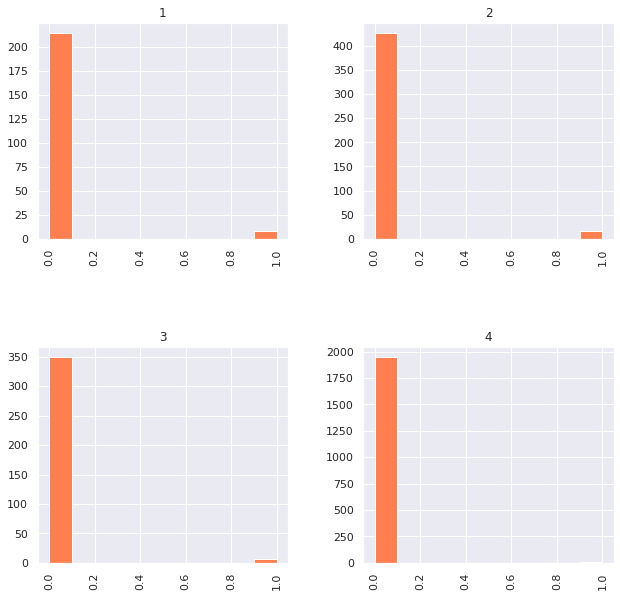

In [143]:
base.hist(column='pisonotiene', by ='Target', figsize=(10,10), color = 'coral')

Aparentemente o percentual de casas sem chão decresce com aumento do nível socioeconômico, mas são poucos casos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c9edd4400>,
      dtype=object)

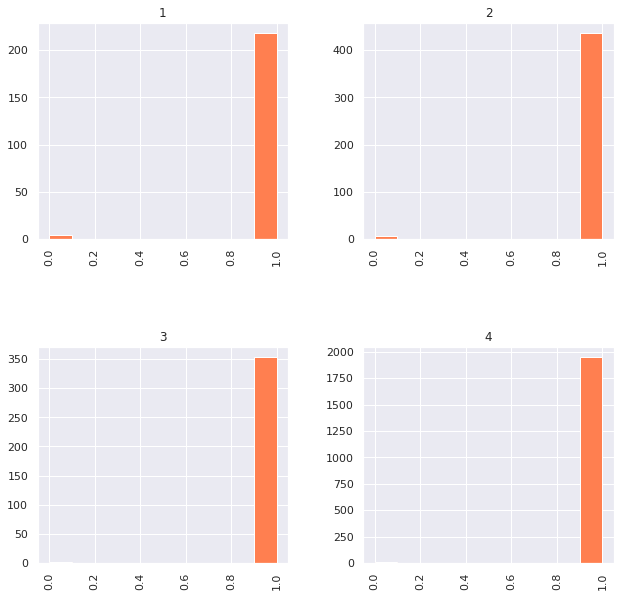

In [144]:
base.hist(column='v14a', by ='Target', figsize=(10,10), color = 'coral')

O percentual de casas sem banheiro parece aumentar também com o aumento do nível socioeconômico, mas são poucos exemplos.

# 4. Imputar dados

In [101]:
target = base['Target']
aux1 = pd.DataFrame({'Target | %': target.value_counts(normalize=True)})
aux1

,Target | %
4,0.657249
2,0.148671
3,0.119408
1,0.074672


In [102]:
base.shape

(2973, 16)

### 4.1 Atributo: *pisonotiene*

In [103]:
sem_chao = base[base['pisonotiene'] == 1.0]
sem_chao.shape

(38, 16)

In [104]:
batch = 32
n_batchs = int(500/batch)
base_aux = sem_chao.sample(batch)
for i in range(n_batchs):
    base_aux = pd.concat([base_aux, sem_chao.sample(batch)], axis = 0)

In [105]:
base = pd.concat([base, base_aux], axis = 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ca6f04e80>,
      dtype=object)

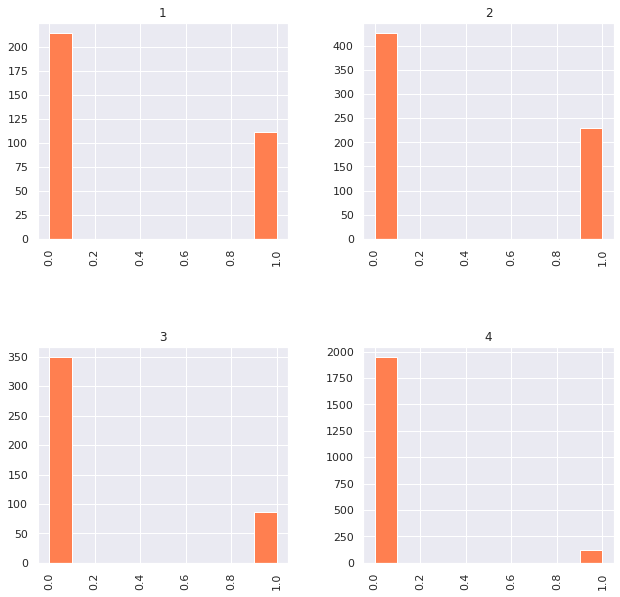

In [106]:
base.hist(column='pisonotiene', by ='Target', figsize=(10,10), color = 'coral')

# 5. Seleção e escalonamento dos dados

### 5.1 Seleção dos melhores atributos

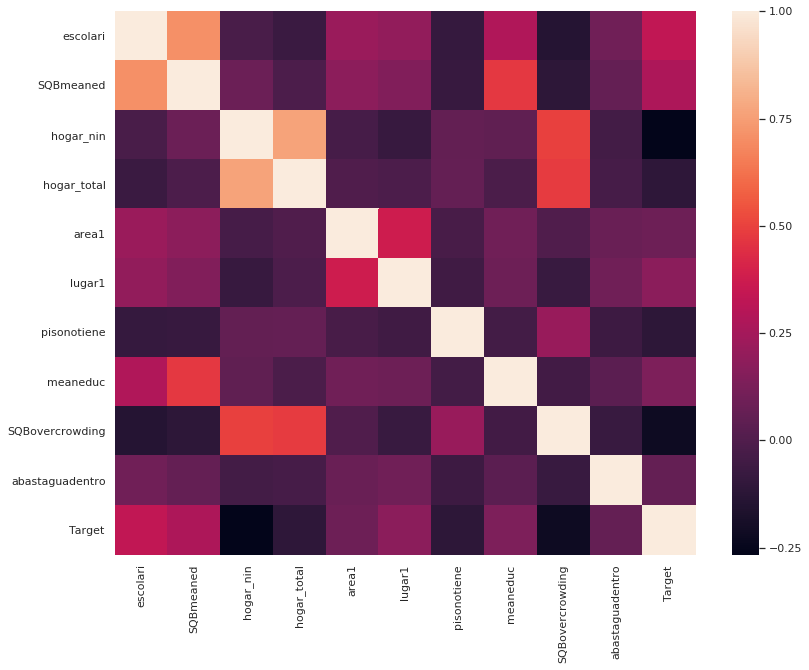

In [152]:
corrmat = base.corr()
sns.set()
plt.figure(figsize=(13,10))
sns.heatmap(corrmat)

In [156]:
base.sample(1)

,escolari,SQBmeaned,hogar_nin,hogar_total,area1,lugar1,pisonotiene,meaneduc,SQBovercrowding,abastaguadentro,Target
Id,,,,,,,,,,,
ID_a4a123514,5,30.25,3,5,0,1,0,5.5,2.777778,1,3


In [153]:
base = base.drop(['cielorazo', 'v14a', 'abastaguano', 'tipovivi1', 'hacdor'], axis = 1)

KeyError: "['cielorazo' 'v14a' 'abastaguano' 'tipovivi1' 'hacdor'] not found in axis"

In [157]:
base.head()

,escolari,SQBmeaned,hogar_nin,hogar_total,area1,lugar1,pisonotiene,meaneduc,SQBovercrowding,abastaguadentro,Target
Id,,,,,,,,,,,
ID_279628684,10,100.0,0,1,1,1,0,10.0,1.000000,1,4
ID_f29eb3ddd,12,144.0,0,1,1,1,0,12.0,1.000000,1,4
ID_68de51c94,11,121.0,0,1,1,1,0,11.0,0.250000,1,4
ID_ec05b1a7b,11,121.0,2,4,1,1,0,11.0,1.777778,1,4
ID_1284f8aad,9,100.0,2,4,1,1,0,10.0,16.000000,1,4


### 5.2 Escalonamento dos dados

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
X = base.drop('Target', axis = 1)
y = base['Target']

In [160]:
scaler_x = StandardScaler()

X = scaler_x.fit_transform(X)

# 6. Classificador k-NN

### 6.1 Seleção dos hiperparâmetros por CV

In [161]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [166]:
scores_mean = []
scores_std = []

k_lim_inf = 1
k_lim_sup = 35

folds = 5

k_max = None
max_acc = 0

i = 0
print('Finding best k...')
for k in range(k_lim_inf, k_lim_sup):
    
    KNNclf = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan', p=2)
    
    score = cross_val_score(KNNclf, X, y, cv = folds)
    
    scores_mean.append(score.mean())
    scores_std.append(score.std())
    
    if scores_mean[i] > max_acc:
        k_max = k
        max_acc = scores_mean[i]
    i += 1
    if not (k%3):
        print('   K = {0} | Best CV acc = {1:2.2f}% (best k = {2})'.format(k, max_acc*100, k_max))
print('\nBest k: {}'.format(k_max))

Finding best k...
   K = 3 | Best CV acc = 54.78% (best k = 3)
   K = 6 | Best CV acc = 57.98% (best k = 6)
   K = 9 | Best CV acc = 59.19% (best k = 9)
   K = 12 | Best CV acc = 59.63% (best k = 12)
   K = 15 | Best CV acc = 60.40% (best k = 15)
   K = 18 | Best CV acc = 61.04% (best k = 17)
   K = 21 | Best CV acc = 61.04% (best k = 17)
   K = 24 | Best CV acc = 61.55% (best k = 24)
   K = 27 | Best CV acc = 61.58% (best k = 26)
   K = 30 | Best CV acc = 61.58% (best k = 26)
   K = 33 | Best CV acc = 61.62% (best k = 31)

Best k: 31


[0, 35, 0.459909391662781, 0.7051374489723875]

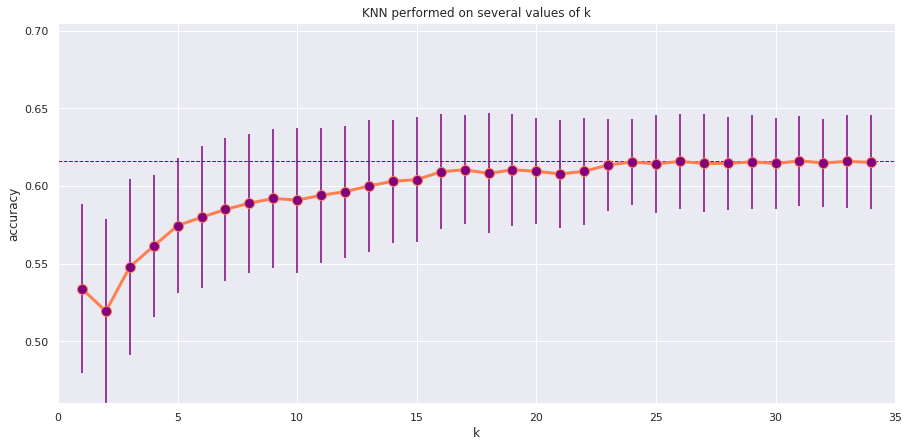

In [167]:
plt.figure(figsize=(15, 7))
plt.errorbar(np.arange(k_lim_inf, k_lim_sup), scores_mean, scores_std,
             marker = 'o', markerfacecolor = 'purple' , linewidth = 3,
             markersize = 10, color = 'coral', ecolor = 'purple', elinewidth = 1.5)


yg = []
x = np.arange(0, k_lim_sup+1)
for i in range(len(x)):
    yg.append(max_acc)
plt.plot(x, yg, '--', color = 'purple', linewidth = 1)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNN performed on several values of k')
plt.axis([0, k_lim_sup, min(scores_mean) - max(scores_std), max(scores_mean) + 1.5*max(scores_std)])

### 6.2 Treinamento do classificador

In [116]:
k = 16
KNNclf = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan', p=2)
KNNclf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

### 6.3 Visualização da fronteira de decisão

from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

#REF: http://w3.impa.br/~vitorgr/CDA/notebooks.html

def plotDecisionKnn(X, y, n_neighbors, weights):
    X_mat = X[['hogar_nin', 'SQBovercrowding']].values
    y_mat = y.values

    # Mapas de cor
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Atribuir uma cor no mapa de cores a cada ponto da malha
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plotar os pontos de treinamento
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='0')
    patch1 = mpatches.Patch(color='#00FF00', label='1')
    patch2 = mpatches.Patch(color='#0000FF', label='2')
    patch3 = mpatches.Patch(color='#AFAFAF', label='3')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('hogar_nin')
    plt.ylabel('SQBovercrowding')
    
    plt.show()

['escolari', 'SQBmeaned', 'hogar_nin', 'hogar_total', 'area1',
            'lugar1', 'cielorazo', 'pisonotiene', 'v14a', 'abastaguano', 'v2a1',
            'hacdor', 'rez_esc', 'meaneduc', 'SQBovercrowding', 'abastaguadentro',
            'tipovivi1', 'Target']

plotDecisionKnn(base.drop('Target', axis = 1).head(100), base['Target'].head(100), 5, 'uniform')   # 5 vizinhos

# 7. Leitura da base teste e submissão dos resultados

### 7.1 Leitura da base teste

In [266]:
df_test = pd.read_csv('test.csv')

In [283]:
features = ['escolari', 'SQBmeaned', 'hogar_nin', 'hogar_total', 'area1',
            'lugar1', 'pisonotiene', 'meaneduc', 'SQBovercrowding', 'abastaguadentro']

In [284]:
base_test = df_test[features]
base_test.head()

,escolari,SQBmeaned,hogar_nin,hogar_total,area1,lugar1,pisonotiene,meaneduc,SQBovercrowding,abastaguadentro
0,0,272.25,1,3,1,1,0,16.5,2.25,1
1,16,272.25,1,3,1,1,0,16.5,2.25,1
2,17,272.25,1,3,1,1,0,16.5,2.25,1
3,16,256.00,0,1,1,1,0,16.0,1.00,1
4,11,NaN,1,1,1,1,0,NaN,0.25,1


### 7.2 Dados faltantes

In [285]:
total = base_test.isnull().sum().sort_values(ascending = False)
percent = ((base_test.isnull().sum()/base_test.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
meaneduc,31,0.129946
SQBmeaned,31,0.129946
abastaguadentro,0,0.000000
SQBovercrowding,0,0.000000
pisonotiene,0,0.000000


In [286]:
col = 'SQBmeaned'
base_test = base_test.astype(np.float)
base_test[col] = base_test[col].fillna(base_test[col].describe().mean())

col = 'meaneduc'
base_test = base_test.astype(np.float)
base_test[col] = base_test[col].fillna(base_test[col].describe().mean())

In [287]:
total = base_test.isnull().sum().sort_values(ascending = False)
percent = ((base_test.isnull().sum()/base_test.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', '%'])
missing_data.head()

,Total,%
abastaguadentro,0,0.0
SQBovercrowding,0,0.0
meaneduc,0,0.0
pisonotiene,0,0.0
lugar1,0,0.0


### 7.3 Escalonamento dos dados

In [288]:
X_test = scaler_x.transform(base_test)

### 7.4 Previsão das classes

In [289]:
previews = KNNclf.predict(X_test)
previews = previews.astype(np.int)
previews = pd.DataFrame({'Target': previews})
previews = pd.concat([df_test['Id'], previews], axis = 1)

In [290]:
previews.head()

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


### 7.4 Submissão dos dados

In [291]:
previews.to_csv('submission.csv', index = False)